In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [24]:
dataset = pd.read_csv(r"C:/Users/My/Downloads/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

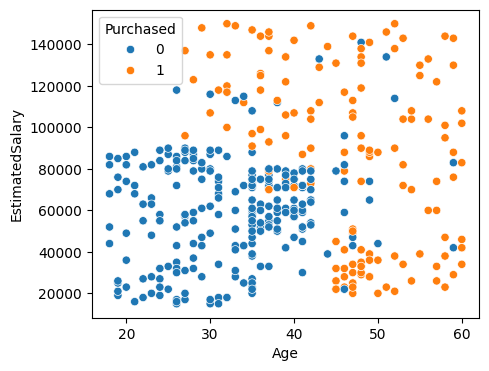

In [26]:
plt.figure(figsize=(5,4))
sns.scatterplot(x ="Age", y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [27]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## Gini model of Decicion trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
dt1.score(x_test,y_test)*100

83.0

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


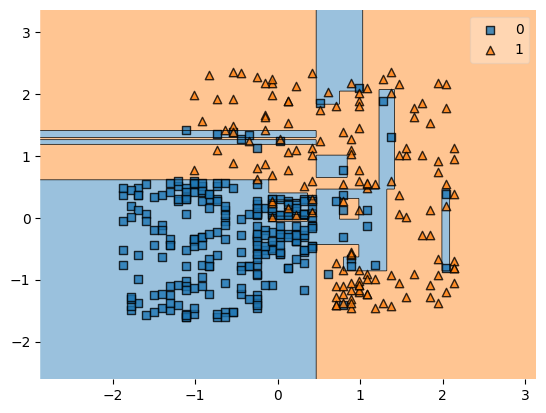

In [35]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [36]:
dt1.predict([[19,19000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [37]:
dt1.predict([[35,20000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [38]:
dt1.predict([[32,150000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
from sklearn.tree import plot_tree

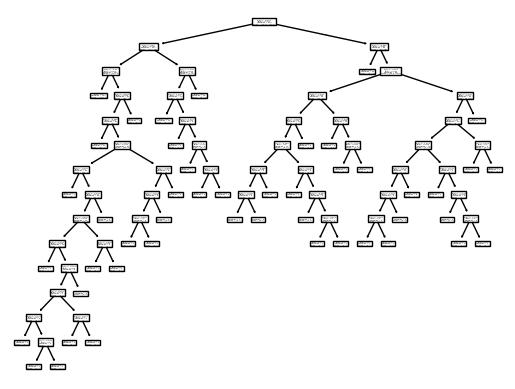

In [40]:
plot_tree(dt1)
plt.show()

##  Entropy model of Decicion trees

In [41]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
dt.score(x_test,y_test)*100

83.0

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


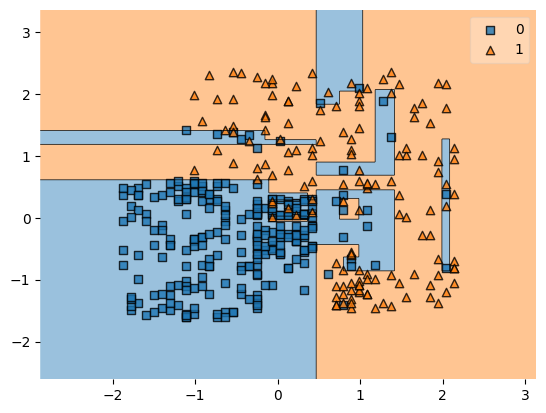

In [43]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [44]:
dt.predict([[19,19000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [45]:
dt.predict([[35,20000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [46]:
dt.predict([[32,150000]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

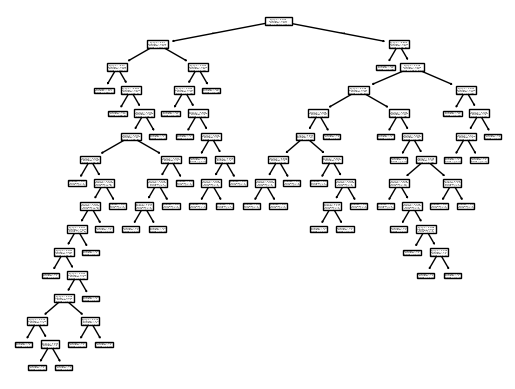

In [47]:
plot_tree(dt)
plt.show()

# Pre Pruning
## For Over fitted model

In [48]:
# Over Fit = train >>> test    big amount deffarence

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt.score(x_test,y_test)*100

83.0

In [51]:
dt.score(x_train,y_train)*100

99.66666666666667

In [52]:
# Depth
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [53]:
dt.score(x_test,y_test)*100

89.0

In [54]:
dt.score(x_train,y_train)*100

93.33333333333333

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


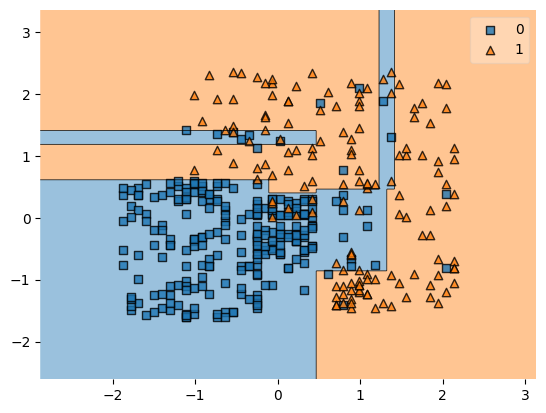

In [55]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

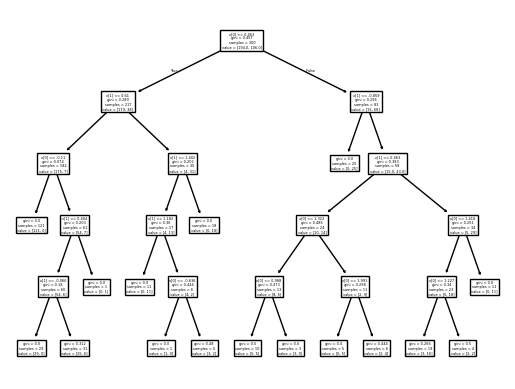

In [56]:
plot_tree(dt)
plt.show()

# Post Pruning
## For Over fitted model

In [57]:
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    print(dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100,i)

82.33333333333334 89.0 1
91.33333333333333 92.0 2
91.33333333333333 92.0 3
93.33333333333333 91.0 4
93.33333333333333 89.0 5
95.66666666666667 89.0 6
97.0 85.0 7
97.33333333333334 85.0 8
98.66666666666667 84.0 9
99.0 83.0 10
99.0 83.0 11
99.0 84.0 12
99.33333333333333 84.0 13
99.66666666666667 83.0 14
99.66666666666667 84.0 15
99.66666666666667 85.0 16
99.66666666666667 84.0 17
99.66666666666667 84.0 18
99.66666666666667 82.0 19


In [58]:
# Depth
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [59]:
dt.score(x_train,y_train)*100

91.33333333333333

In [60]:
dt.score(x_test,y_test)*100

92.0

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


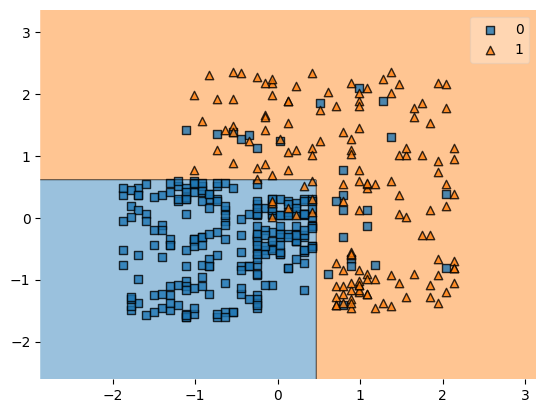

In [61]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

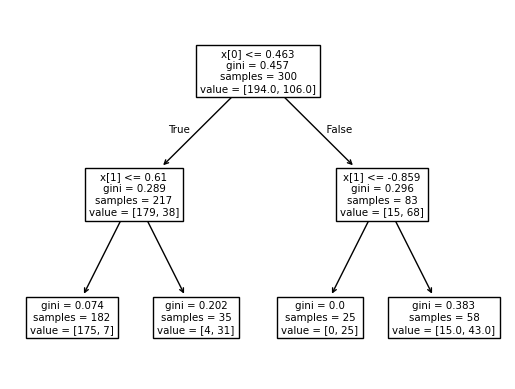

In [62]:
plot_tree(dt)
plt.show()